# 💰 Value at Risk (VaR) Calculator

This project calculates and compares Value at Risk (VaR) using:
- 📉 Historical Simulation
- 🧠 Parametric (Variance-Covariance / Gaussian)

## 🛠️ Tools Used
- Python (Jupyter Notebook)
- Numpy, Pandas, Matplotlib

## 📌 What is VaR?
Value at Risk (VaR) estimates the maximum loss that a portfolio might face over a specific time period at a given confidence level.  
For example:  
> “At 95% confidence, you may lose no more than ₹50,000 in 1 day.”

We’ll calculate this using both empirical and statistical approaches.


---

## 📦 Step 1: Import Libraries and Utilities

We’ll start by importing all the Python packages needed to calculate VaR.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')

from parametric_var import calculate_parametric_var


---

## 📊 Step 2: Generate Synthetic Portfolio Returns

We generate normally distributed daily returns for a simulated 1-year portfolio (252 trading days), assuming:
- Mean daily return = 0.1%
- Standard deviation = 2%

This models a generic portfolio for illustrative purposes.


In [3]:
# Generate fake daily returns for 1 year (252 trading days)
np.random.seed(42)
returns = np.random.normal(0.001, 0.02, 252)  # mean return = 0.1%, std dev = 2%
returns = pd.Series(returns)
returns.head()


0    0.010934
1   -0.001765
2    0.013954
3    0.031461
4   -0.003683
dtype: float64

---

## 📉 Step 3: Calculate Value at Risk Using Historical Method

We use actual historical returns to estimate potential loss. This is a non-parametric method and doesn’t assume any return distribution.

🔎 **Logic:**
Sort the past returns and pick the percentile value corresponding to the chosen confidence level.


In [ ]:
# Set confidence level
confidence_level = 0.95

# Calculate historical VaR
var_95 = np.percentile(returns, (1 - confidence_level) * 100)
print(f"🔻 Historical VaR at 95% confidence: {round(var_95 * 100, 2)}%")


🔻 Historical VaR at 95% confidence: -2.89%


---

## 🧠 Step 4: Parametric (Gaussian) VaR Method

This method assumes returns are normally distributed and uses this formula:

**VaR = - (μ - z × σ)**

Where:  
- μ = Mean of returns  
- σ = Standard deviation of returns  
- z = Z-score for desired confidence (e.g., 1.65 for 95%)  

This method is efficient but may not always be accurate if returns are not normally distributed.


In [ ]:
mean_return = returns.mean()
std_dev = returns.std()

# Z-score for 95% confidence ≈ 1.65
z = 1.65

parametric_var = -(mean_return - z * std_dev)
print(f"🔻 Parametric VaR at 95% confidence: {round(parametric_var * 100, 2)}%")


🔻 Parametric VaR at 95% confidence: 3.1%


---

## 🧾 Step 5: VaR Comparison Summary

| Method       | Confidence Level | Value at Risk (%) |
|--------------|------------------|-------------------|
| Historical   | 95%              | -2.89%            |
| Parametric   | 95%              | 3.10%             |

✅ This table shows a quick comparison of the two VaR methods.  
You can clearly see how different assumptions (distribution-based vs historical) lead to different estimates.


In [7]:
mean_return = returns.mean()
std_dev = returns.std()
z = 1.65  # for 95% confidence

parametric_var = -(mean_return - z * std_dev)


In [5]:
# Historical VaR at 95% confidence level
confidence_level = 0.95
var_95 = np.percentile(returns, (1 - confidence_level) * 100)


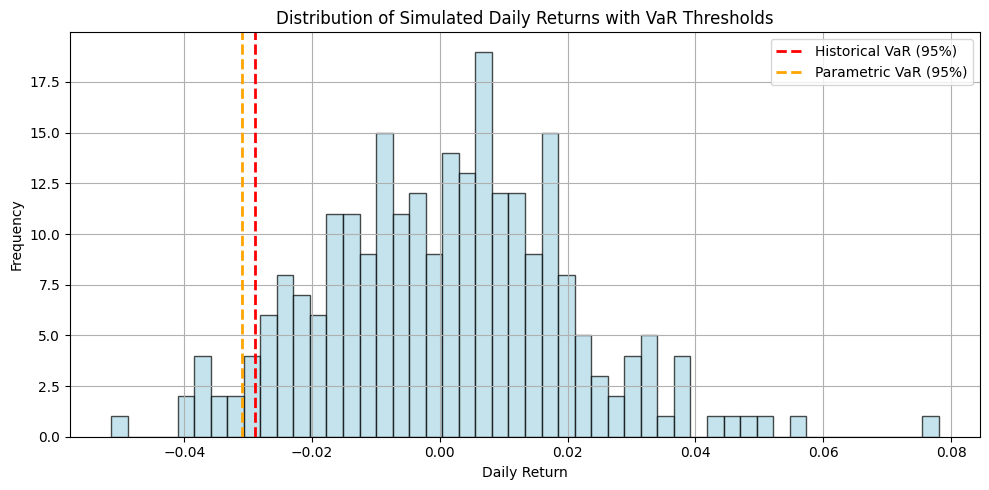

In [8]:
# Step 5: Plot the Return Distribution and VaR thresholds
plt.figure(figsize=(10, 5))
plt.hist(returns, bins=50, color='lightblue', edgecolor='black', alpha=0.7)

# VaR lines
plt.axvline(var_95, color='red', linestyle='dashed', linewidth=2, label='Historical VaR (95%)')
plt.axvline(-parametric_var, color='orange', linestyle='dashed', linewidth=2, label='Parametric VaR (95%)')

# Labels and style
plt.title('Distribution of Simulated Daily Returns with VaR Thresholds')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


---

## ✅ Conclusion

In this project, we demonstrated how to calculate Value at Risk (VaR) using:

- 📉 **Historical Method** — Non-parametric, percentile-based
- 📈 **Parametric Method** — Assumes returns are normally distributed

We also visualized the return distribution and highlighted the VaR thresholds to better understand downside risks in financial portfolios.

---

## 🚀 Next Steps (for further enhancement)

- Add Monte Carlo Simulation-based VaR
- Include backtesting using historical portfolio data
- Build a Streamlit dashboard for real-time VaR calculation

---

🔗 [GitHub Repo](https://github.com/Soumya-8/value-at-risk-calculator)
